In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const

import Bell_EBM as ebm

In [2]:
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 16)

star = ebm.Star(teff=6300., rad=1.59, mass=1.20)

system = ebm.System(star, planet)

In [3]:
# Run initial burn-in - try guessing the equilibrium temperature to begin with
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*2
dt = system.planet.Porb/1000.
times, maps = system.run_model(T0, t0, t1, dt, verbose=False)

In [13]:
system.lightcurve_tester(system.planet.orbit.t0+np.linspace(0., system.planet.orbit.Prot, 2000))

(0.05829668045043945,
 array([0.00096422, 0.00096473, 0.00096524, ..., 0.00096318, 0.0009637 ,
        0.00096422]))

In [12]:
system.lightcurve_tester(system.planet.orbit.t0+np.linspace(0., system.planet.orbit.Prot, 2000))

(0.06330204010009766,
 array([0.00096422, 0.00096473, 0.00096524, ..., 0.00096318, 0.0009637 ,
        0.00096422]))

In [10]:
nTests = 5 #Number of intervals ex: 100, 200, 300 updates is 3 intervals
dataArray = np.zeros(shape=(2,nTests))
nloop = 3 #Number of times the calculations are to be redone for avg
nStep = 100. #Step number ex: 100, 200, 300 updates is 100 step number
for j in range(0, nTests):
    rTotal = 0.
    for i in range(0, nloop):
        Teq = system.get_teq()
        T0 = np.ones_like(system.planet.map.values)*Teq
        t0 = 0.
        t1 = t0+system.planet.Porb*1
        dt = system.planet.Porb/(nStep*(j+1))
        maps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
        rTotal = rTotal + float(ttc)
    ttcavg = rTotal/nloop
    dataArray[0,j] = ttcavg
    dataArray[1,j] = (nStep*(j+1))
    print('Avergae time to compute at ' + str((nStep*(j+1)))+ ' updates: ' + str(ttcavg))

Avergae time to compute at 100.0 updates: 0.0956716537475586
Avergae time to compute at 200.0 updates: 0.18130882581075033
Avergae time to compute at 300.0 updates: 0.3122839132944743
Avergae time to compute at 400.0 updates: 0.40096139907836914
Avergae time to compute at 500.0 updates: 0.5029904047648112


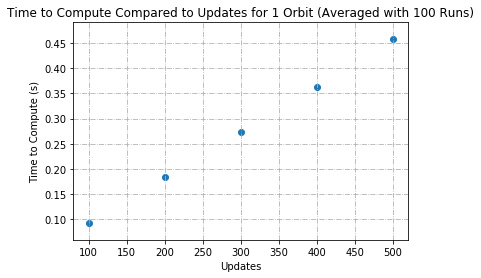

In [5]:
y = dataArray[0,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Updates")
plt.ylabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Updates for 1 Orbit (Averaged with 100 Runs)')
plt.grid(True, linestyle='-.')
plt.show()

In [3]:
# Base line map generator
bUpdates = 10000. #Amount of timesteps in baseline

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*1
dt = system.planet.Porb/bUpdates
baselineMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()

In [44]:
print('Baseline map array:')
print(baselineMaps)

Baseline map array:
[[1944.90636846 2565.32847201 2889.89966164 3108.73014053 3263.65918481
  3371.37115433 3439.90613802 3473.30995859 3473.30995859 3439.90613802
  3371.37115433 3263.65918481 3108.73014053 2889.89966164 2565.32847201
  1944.90636846 1928.44819144 2515.08833611 2826.67958281 3037.30172129
  3186.60731996 3290.48755323 3356.61449244 3388.85258781 3388.85258781
  3356.61449244 3290.48755323 3186.60731996 3037.30172129 2826.67958281
  2515.08833611 1928.44819144 1890.62403069 2438.63929902 2732.5611932
  2931.6846073  3073.02077041 3171.43690839 3234.11788188 3264.68475047
  3264.68475047 3234.11788188 3171.43690839 3073.02077041 2931.6846073
  2732.5611932  2438.63929902 1890.62403069 1832.91013408 2333.75173497
  2603.71405263 2786.92655997 2917.13105966 3007.87524249 3065.70355132
  3093.91335813 3093.91335813 3065.70355132 3007.87524249 2917.13105966
  2786.92655997 2603.71405263 2333.75173497 1832.91013408 1755.56620588
  2196.44896219 2433.48070775 2594.30853809 27

In [14]:
# Run initial burn-in - try guessing the equilibrium temperature to begin with
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*1
dt = system.planet.Porb/10000.
testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)

In [15]:
print('Test map array')
#print(np.absolute(baselineMaps-testMaps))

Test map array


In [8]:
print(np.mean(np.absolute(baselineMaps-testMaps)))
print(np.amax(np.absolute(baselineMaps-testMaps)))

0.6692122408613641
5.452224828740555


Main tester

In [4]:
ttct = 0.

# ---Variables---
nTests = 10 #Number of intervals ex: 100, 200, 300 updates is 3 intervals
nloop = 5 #Number of times the calculations are to be redone for avg
nStep = 100. #Step number ex: 100, 200, 300 updates is 100 step number

dataArray = np.zeros(shape=(5,nTests))

for j in range(0, nTests):
    rTotal = 0.
    eMax = 0.
    eTotal = np.zeros_like(system.planet.map.values)
    lcTotal = np.zeros_like(baselineLightcurve)
    for i in range(0, nloop):
        Teq = system.get_teq()
        T0 = np.ones_like(system.planet.map.values)*Teq
        t0 = 0.
        t1 = t0+system.planet.Porb*1
        dt = system.planet.Porb/(nStep*(j+1))
        testMaps, ttc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
        rTotal = rTotal + float(ttc)
        ttct = ttct + float(ttc)
        eTotal = eTotal + testMaps
        lcTotal = lcTotal + np.absolute(system.lightcurve())
        if (np.amax(np.absolute(testMaps))>eMax):
            eMax = np.amax(np.absolute(baselineMaps-testMaps))
    ttcavg = rTotal/nloop
    eTotalavg = eTotal/nloop
    lcTotalavg = lcTotal/nloop
    
    dataArray[0,j] = ttcavg #Time to Compute
    dataArray[1,j] = (nStep*(j+1)) #Time steps
    dataArray[2,j] = (np.mean(np.absolute(baselineMaps-eTotalavg))) #Mean error on heat
    dataArray[3,j] = (np.amax(np.absolute(baselineMaps-eTotalavg))) #Maximum error on heat
    dataArray[4,j] = (np.mean(np.absolute(baselineLightcurve-lcTotalavg))) #Mean error on lightcurve
    
    print('Accuracy lost at ' + str((nStep*(j+1))) + ' updates:' + str(np.mean(np.absolute(baselineMaps-eTotalavg))))
    print('Max accuracy lost at ' + str((nStep*(j+1))) + ' updates:' + str(eMax))
    print('Avergae time to compute at ' + str((nStep*(j+1)))+ ' updates: ' + str(ttcavg))
    print('Accuracy lost (LC) at ' + str((nStep*(j+1))) + ' updates:' + str(dataArray[4,j]))
    print('----------')
    
print('Total computational time: ' + str(ttct/60) + ' minutes')

Accuracy lost at 100.0 updates:0.5912004369307344
Max accuracy lost at 100.0 updates:3.927988879651366
Avergae time to compute at 100.0 updates: 0.02523980140686035
Accuracy lost (LC) at 100.0 updates:6.793089202321533e-08
----------
Accuracy lost at 200.0 updates:0.2918561348245845
Max accuracy lost at 200.0 updates:1.892887977616283
Avergae time to compute at 200.0 updates: 0.04888138771057129
Accuracy lost (LC) at 200.0 updates:3.3149615342561805e-08
----------
Accuracy lost at 300.0 updates:0.1924096870079155
Max accuracy lost at 300.0 updates:1.2384773227529422
Avergae time to compute at 300.0 updates: 0.07008986473083496
Accuracy lost (LC) at 300.0 updates:2.1775370878995077e-08
----------
Accuracy lost at 400.0 updates:0.1427531594875484
Max accuracy lost at 400.0 updates:0.9154474108729573
Avergae time to compute at 400.0 updates: 0.11394028663635254
Accuracy lost (LC) at 400.0 updates:1.6127117897343045e-08
----------
Accuracy lost at 500.0 updates:0.11298107341487373
Max accu

In [51]:
print(str(eTotal))

[[19458.19182091 25657.73579136 28902.40401172 31090.2757996
  32639.31601451 33716.28157694 34401.54045641 34735.53614725
  34735.53614725 34401.54045641 33716.28157694 32639.31601451
  31090.2757996  28902.40401172 25657.73579136 19458.19182091
  19293.20995727 25155.44200706 28270.53328627 30376.35967635
  31869.1761935  32907.82718389 33569.00589206 33891.34410751
  33891.34410751 33569.00589206 32907.82718389 31869.1761935
  30376.35967635 28270.53328627 25155.44200706 19293.20995727
  18914.63233012 24391.48883094 27330.04006933 29320.91709621
  30734.05105837 31718.06393719 32344.78290978 32650.40834788
  32650.40834788 32344.78290978 31718.06393719 30734.05105837
  29320.91709621 27330.04006933 24391.48883094 18914.63233012
  18337.52664263 23343.66505646 26042.83742292 27874.69442503
  29176.55482561 30083.86968833 30662.0724681  30944.13152514
  30944.13152514 30662.0724681  30083.86968833 29176.55482561
  27874.69442503 26042.83742292 23343.66505646 18337.52664263
  17564.60

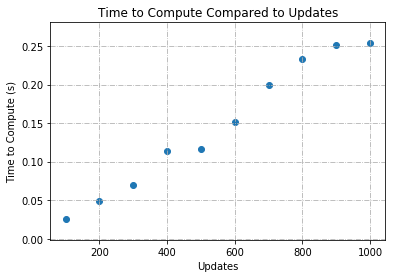

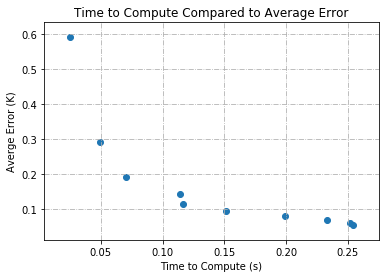

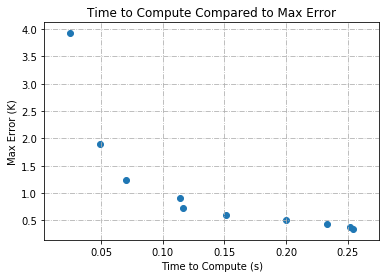

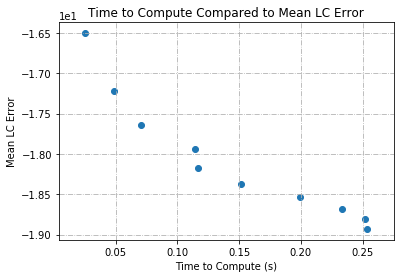

In [5]:
y = dataArray[0,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Updates")
plt.ylabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Updates')
plt.grid(True, linestyle='-.')
plt.show()

"""
y = dataArray[2,:]
x = dataArray[1,:]
plt.scatter(x, y)
plt.xlabel("Updates")
plt.ylabel("Averge Error (K)")
plt.title('Averge Error Compared to Updates')
plt.grid(True, linestyle='-.')
plt.show()
"""
x = dataArray[0,:]
y = dataArray[2,:]
plt.scatter(x, y)
plt.ylabel("Averge Error (K)")
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Average Error')
plt.grid(True, linestyle='-.')
plt.show()

x = dataArray[0,:]
y = dataArray[3,:]
plt.scatter(x, y)
plt.ylabel("Max Error (K)")
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Max Error')
plt.grid(True, linestyle='-.')
plt.show()

x = dataArray[0,:]
y = np.log(dataArray[4,:])
plt.scatter(x, y)
plt.ylabel("Mean LC Error")
plt.xlabel("Time to Compute (s)")
plt.title('Time to Compute Compared to Mean LC Error')
plt.grid(True, linestyle='-.')
#plt.ylim(bottom=0, top = 1e-6) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

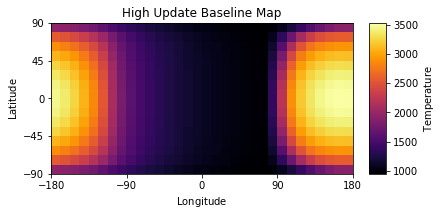

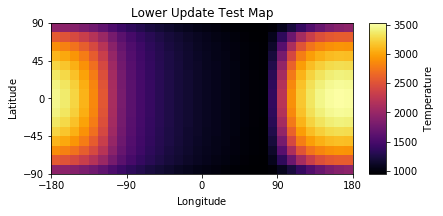

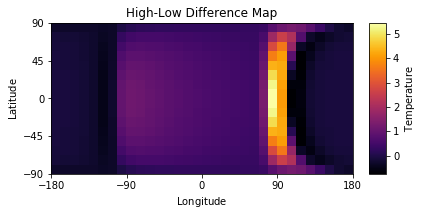

In [79]:
fig = system.planet.plot_map(baselineMaps)
title = 'High Update Baseline Map'
plt.title(title)
plt.show()
fig = system.planet.plot_map((eTotalavg))
title = 'Lower Update Test Map'
plt.title(title)
plt.show()
fig = system.planet.plot_map((baselineMaps-eTotalavg))
plt.title('High-Low Difference Map')
plt.show()

In [81]:
system.lightcurve()

(1000,)

In [13]:
    dataArray[3,:]

array([2440.33970356, 2439.93734761, 2439.80309723, 2439.73594541,
       2439.69564554, 2439.66877523, 2439.64958032, 2439.63518312,
       2439.6239847 , 2439.61502557, 2439.60769513, 2439.60158625,
       2439.59641708, 2439.59198626, 2439.58814616, 2439.58478601,
       2439.58182114, 2439.57918566, 2439.57682758, 2439.57470529])

In [7]:
dataArray[3,:]

array([2440.33970356, 2439.93734761, 2439.80309723, 2439.73594541,
       2439.69564554, 2439.66877523, 2439.64958032, 2439.63518312,
       2439.6239847 , 2439.61502557, 2439.60769513, 2439.60158625,
       2439.59641708, 2439.59198626, 2439.58814616, 2439.58478601,
       2439.58182114, 2439.57918566, 2439.57682758, 2439.57470529])